In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [49]:
pokemon_df=pd.read_csv('pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [50]:
combats_df=pd.read_csv('combats.csv')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [51]:
tests_df=pd.read_csv('tests.csv')
tests_df.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [52]:
# Vérifier les valeurs manquantes
print(pokemon_df.isnull().sum())

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [53]:
pokemon_df['Type 2'].fillna('None', inplace=True)

/var/folders/wz/7t3z91_d40z_sxhmmsv87j100000gn/T/ipykernel_4394/120349201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['Type 2'].fillna('None', inplace=True)


In [54]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False


In [55]:
# Remplir le nom manquant
pokemon_df.loc[pokemon_df['#'] == 62, 'Name'] = 'Primeape'

In [56]:
# Calcul du taux de victoire
wins = combats_df['Winner'].value_counts().rename('Wins')
all_combatants = pd.concat([combats_df['First_pokemon'], combats_df['Second_pokemon']])
total_battles = all_combatants.value_counts().rename('Total_Battles')
win_stats = pd.concat([wins, total_battles], axis=1).fillna(0)
win_stats['Win_Percentage'] = win_stats['Wins'] / win_stats['Total_Battles']

In [57]:
print(win_stats.head(10))


      Wins  Total_Battles  Win_Percentage
163  152.0            164        0.926829
438  136.0            149        0.912752
154  136.0            141        0.964539
428  134.0            153        0.875817
314  133.0            150        0.886667
432  133.0            145        0.917241
214  130.0            158        0.822785
394  130.0            139        0.935252
249  128.0            135        0.948148
155  127.0            129        0.984496


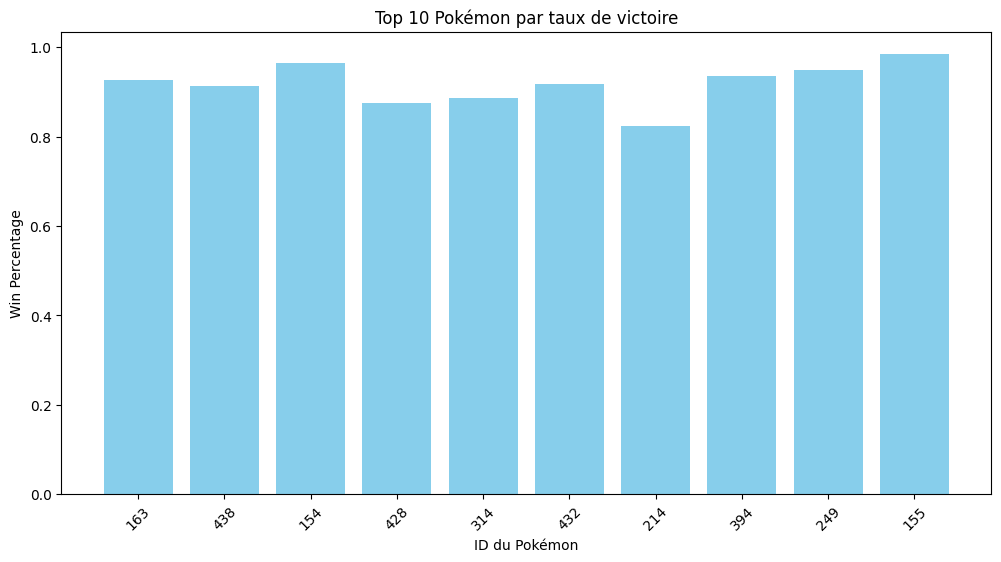

In [58]:
import matplotlib.pyplot as plt

# Top 10 des Pokémon par taux de victoire
top_10 = win_stats.head(10)

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(top_10.index.astype(str), top_10['Win_Percentage'], color='skyblue')
plt.title("Top 10 Pokémon par taux de victoire")
plt.xlabel("ID du Pokémon")
plt.ylabel("Win Percentage")
plt.xticks(rotation=45)
plt.show()

Ce graphique montre les 10 Pokémon avec le meilleur taux de victoire. Les ID Pokémon 154 et 155 se démarquent avec un taux de victoire proche de 100%, indiquant une efficacité remarquable en combat.
Les autres Pokémon, bien que légèrement en dessous, affichent tous un taux supérieur à 83%, ce qui les positionne comme des valeurs sûres dans une stratégie de victoire.

In [59]:
#On ajoute la colonne Win_Percentage depuis win_stats au DataFrame pokemon
pokemon_df = pokemon_df.set_index("#")
pokemon_df['Win_Percentage'] = win_stats['Win_Percentage']

In [61]:
# Colonnes numériques pertinentes
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Percentage']
corr_matrix = pokemon_df[numeric_cols].corr()

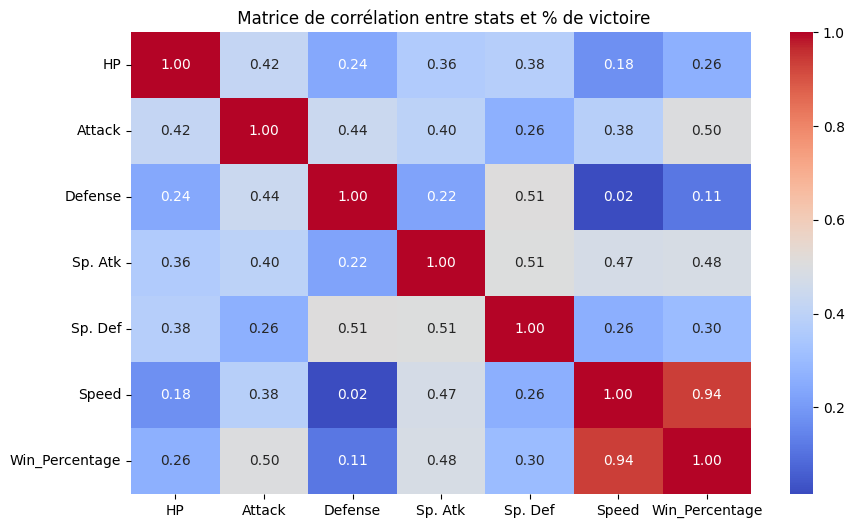

In [62]:
# Heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Matrice de corrélation entre stats et % de victoire")
plt.show()

La vitesse (Speed) est de loin la statistique la plus corrélée au taux de victoire des Pokémon (corrélation de 0.94), ce qui en fait le facteur déterminant de performance en combat.

Les autres stats contribuant significativement à la victoire sont :

Attaque (0.50),

Attaque Spéciale (0.48).

Conclusion : Pour optimiser les performances, il faut privilégier des Pokémon rapides et offensifs. Les statistiques défensives sont moins décisives pour gagner.

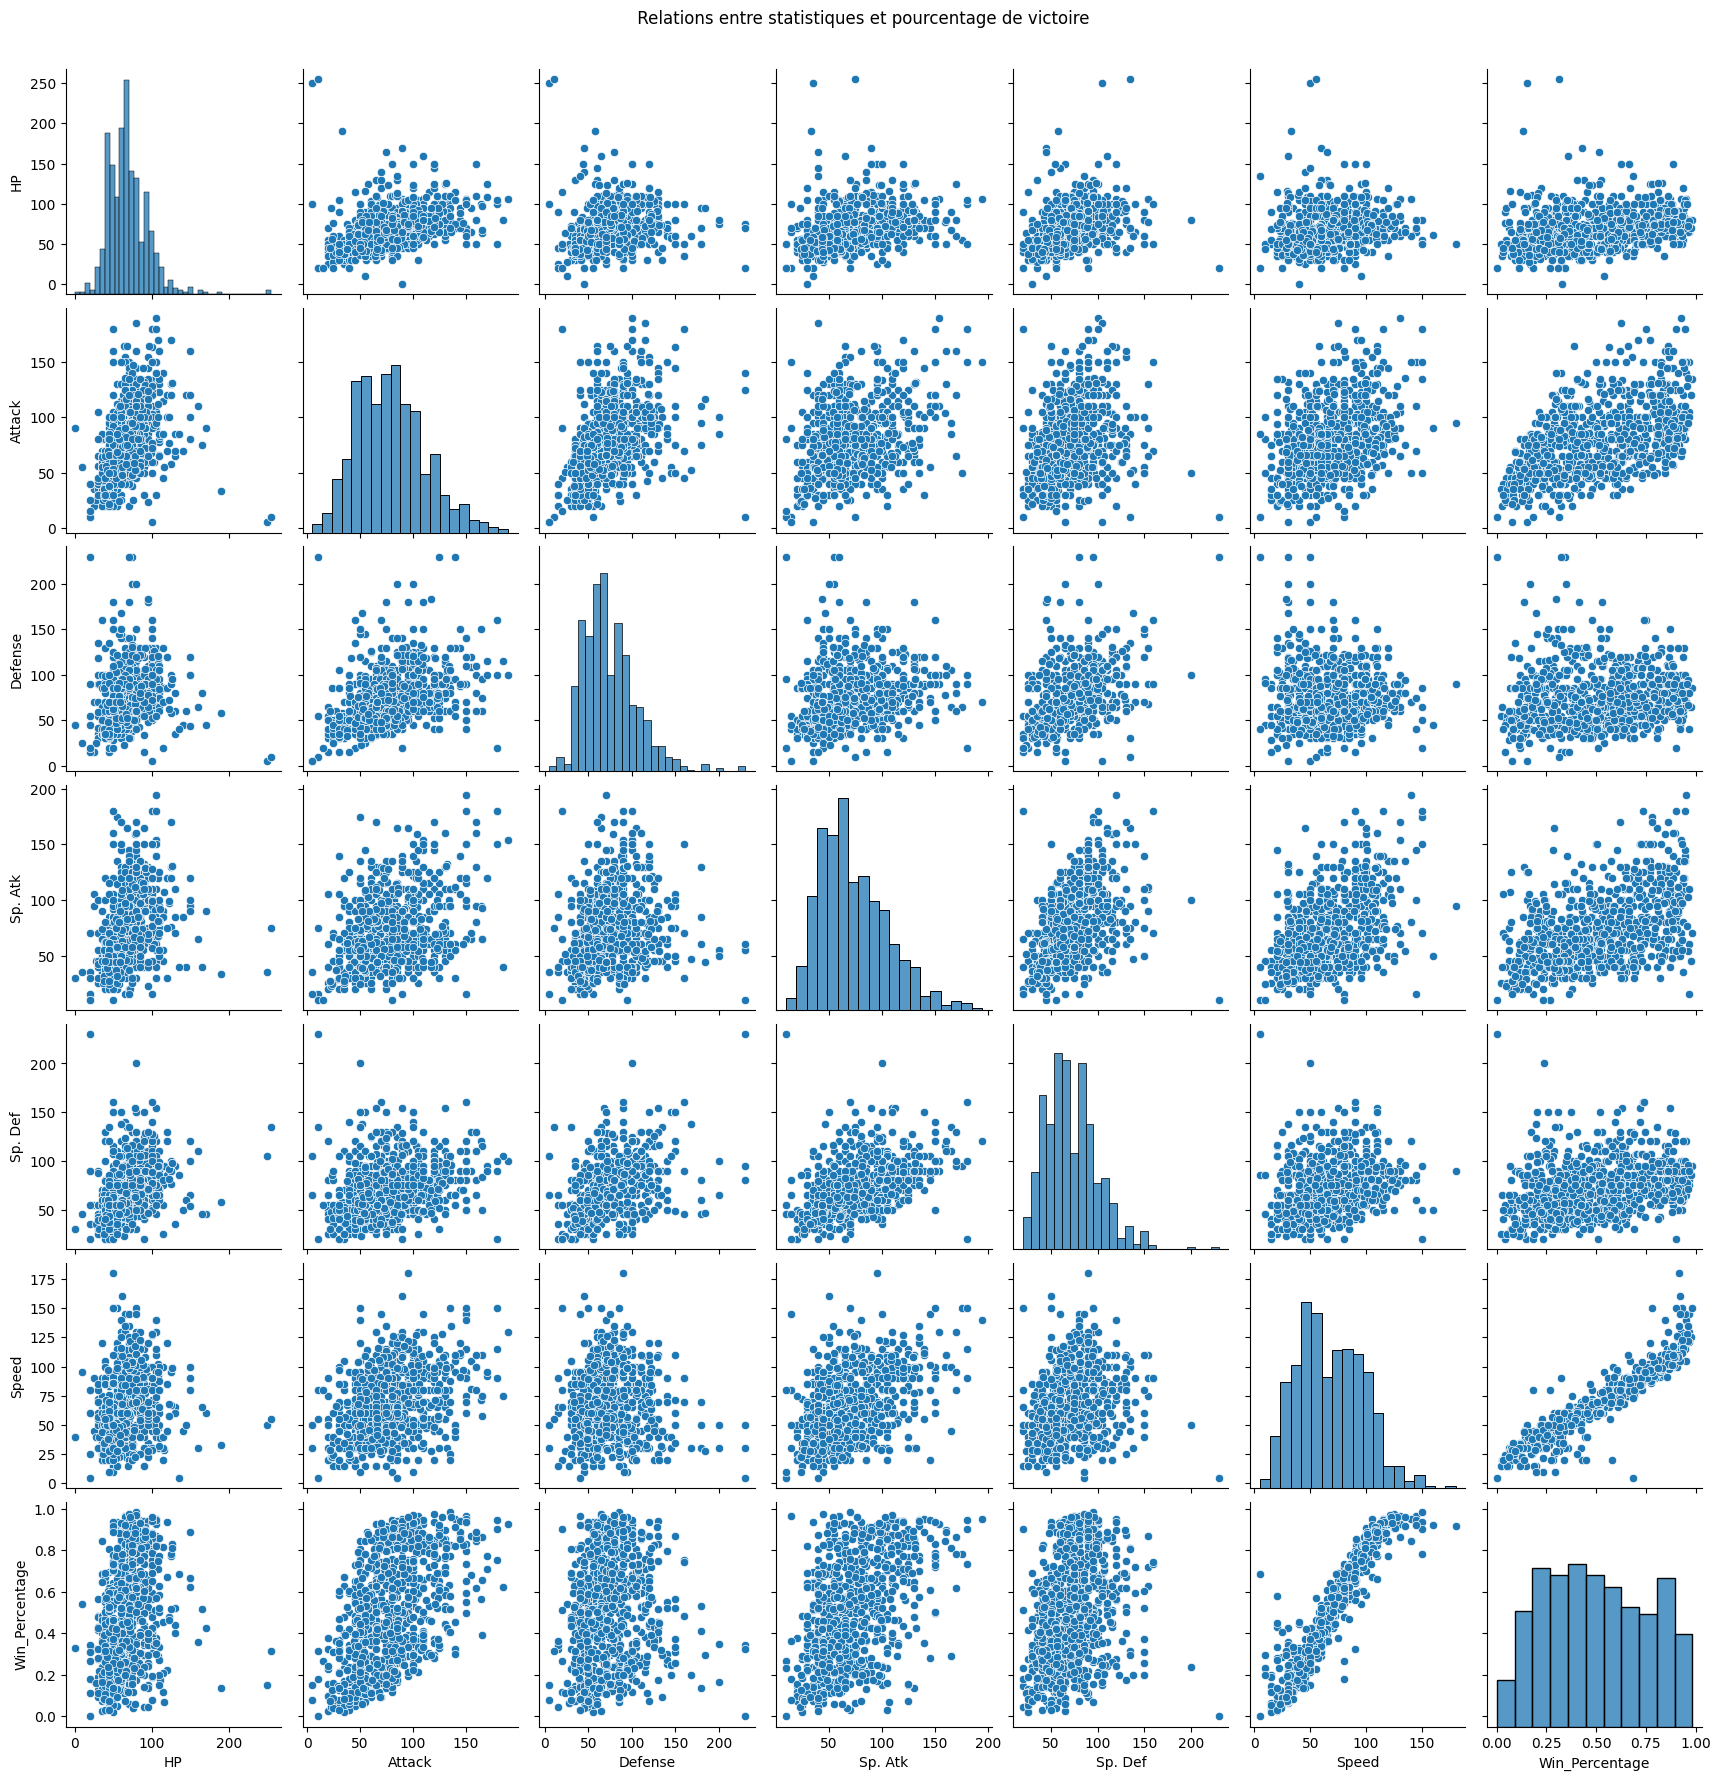

In [63]:

sns.pairplot(pokemon_df[numeric_cols])
plt.suptitle(" Relations entre statistiques et pourcentage de victoire", y=1.02)
plt.show()

Ce pairplot confirme visuellement les corrélations observées précédemment :

La vitesse (Speed) a une relation fortement croissante avec le taux de victoire : plus un Pokémon est rapide, plus il gagne.

Les statistiques offensives (Attack, Sp. Atk) présentent aussi une relation positive modérée avec la victoire.

En revanche, les statistiques défensives (Defense, Sp. Def, HP) n'affichent aucun lien clair avec la performance.

Conclusion opérationnelle : Pour maximiser les chances de victoire en combat, il faut favoriser les Pokémon à forte vitesse et attaque. Les Pokémon “tanks” résistent peut-être mieux, mais gagnent moins souvent.

In [72]:
# Sélection des features
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Nettoyage : conversion en numérique et suppression des NaN
pokemon_df[features] = pokemon_df[features].apply(pd.to_numeric, errors='coerce')
pokemon_df['Win_Percentage'] = pd.to_numeric(pokemon_df['Win_Percentage'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes
pokemon_df = pokemon_df.dropna(subset=features + ['Win_Percentage'])

X = pokemon_df[features]
y = pokemon_df['Win_Percentage']


# Mise à l’échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
# Affichage des tailles
print(f"Nombre de données au total : {len(X)}")
print(f"Nombre de données dans le train (80%) : {len(X_train)}")
print(f"Nombre de données dans le test (20%) : {len(X_test)}")

Nombre de données au total : 784
Nombre de données dans le train (80%) : 627
Nombre de données dans le test (20%) : 157


In [75]:
# Définir les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
  
}

In [76]:
# Entraînement et évaluation
mae_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae
    print(f"{name} - MAE: {mae:.2f}")


Linear Regression - MAE: 0.06
Random Forest - MAE: 0.04


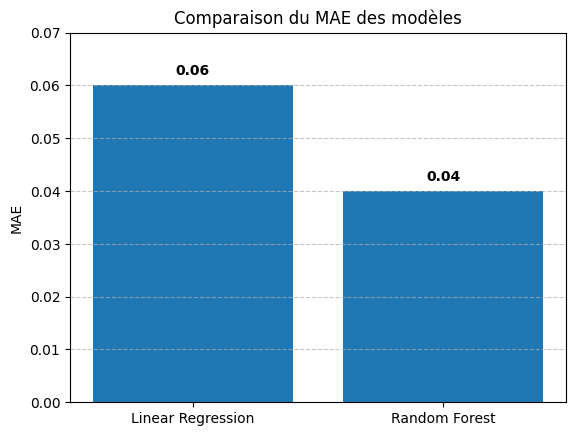

In [84]:
# Données
models = ['Linear Regression', 'Random Forest']
mae_values = [0.06, 0.04]

# Visualisation
plt.bar(models, mae_values)
plt.title('Comparaison du MAE des modèles')
plt.ylabel('MAE')
plt.ylim(0, 0.07)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mae_values):
    plt.text(i, v + 0.002, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

Le modèle Random Forest présente une erreur moyenne absolue (MAE) de 0.04, contre 0.06 pour la régression linéaire.
Cela se traduit par des prédictions plus précises et plus fiables.
Recommandation : adopter le modèle Random Forest pour une meilleure qualité prédictive dans l’usage métier.